In [67]:
import sys
import os
from pathlib import Path
import json
from matplotlib import pyplot as plt
import numpy as np

notebooks_dir = os.getcwd()
project_dir = os.path.dirname(notebooks_dir)
code_dir = os.path.join(project_dir, 'code')  
if code_dir not in sys.path:
    sys.path.insert(0, code_dir)


import torch
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
elif torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")
DEVICE

device(type='cuda')

In [68]:
import glob
root = Path(r"C:\Users\aapolina\CODE\diffusion_segmentation\REPO\diffusion_segmentation\training\linear probe 3")

# weights evolution

In [69]:
def plot_weights_evolution(all_weights, key, axs):

    w = key
    n = len(all_weights['0'][w])
    if w=='wt':
        suffix = [0, 111, 222, 333, 444, 555, 666, 777, 888, 999]
    elif w=='wc':
        suffix = range(77)
    elif w=='wr':
        suffix = [8,16,32,64]
    elif w=='ws':
        suffix = [""]   
    assert n==len(suffix)
    colors = plt.cm.PiYG(np.linspace(0,1,n))  
                        
    for i in range(n):
        data = [all_weights[str(epoch)][w][i] for epoch in all_weights.keys()]
        axs.plot(data, label = f"{w}_{suffix[i]}", color=colors[i])

    axs.set_xlabel('epoch')
    axs.set_ylabel('Weight')
    axs.legend()

    return axs


In [70]:
def plot_weights_evolution_all_models(json_files, weight_name):
    n = len(json_files) 
    fig, axs = plt.subplots(1,n, figsize=(20, 20/n))

    # Iterate over the json files
    for i, file in enumerate(json_files):
        with open(file, "r") as f:
            data = json.load(f)
            plot_weights_evolution(data, weight_name, axs[i])
            axs[i].set_title(f'Model {i+1}')

    fig.tight_layout()
    fig.show()


In [71]:
json_files = glob.glob(str(root / "*.json"))

C:\Users\aapolina\AppData\Local\Temp\ipykernel_16944\42889491.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


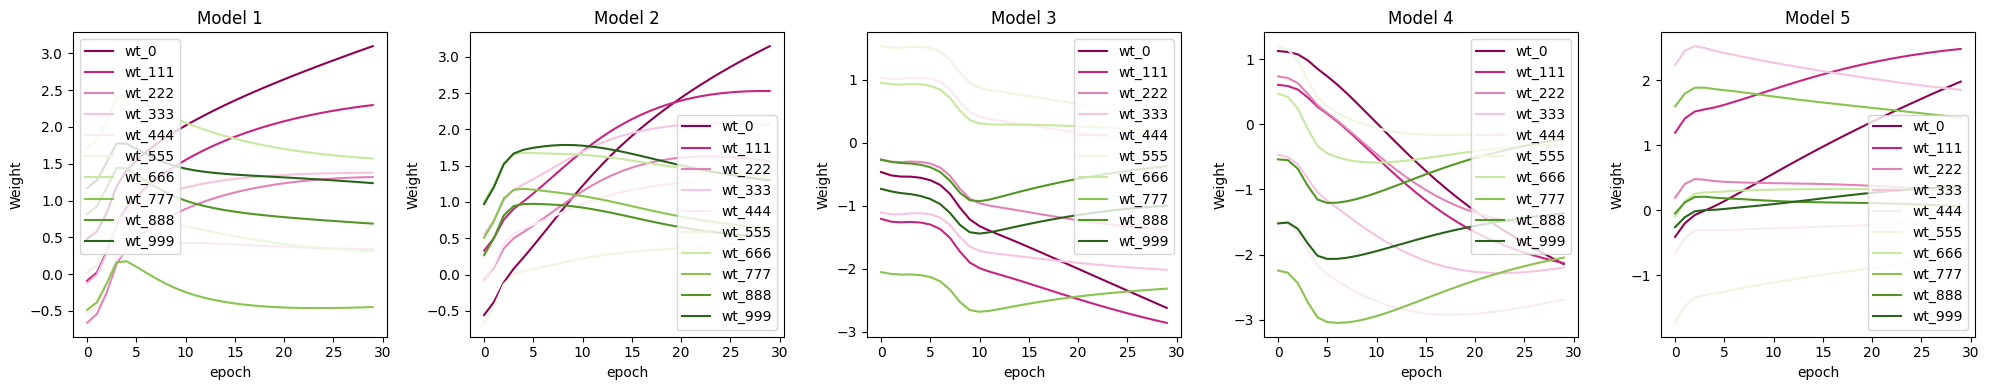

In [72]:
plot_weights_evolution_all_models(json_files, 'wt')  #rimestep  

C:\Users\aapolina\AppData\Local\Temp\ipykernel_16944\42889491.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


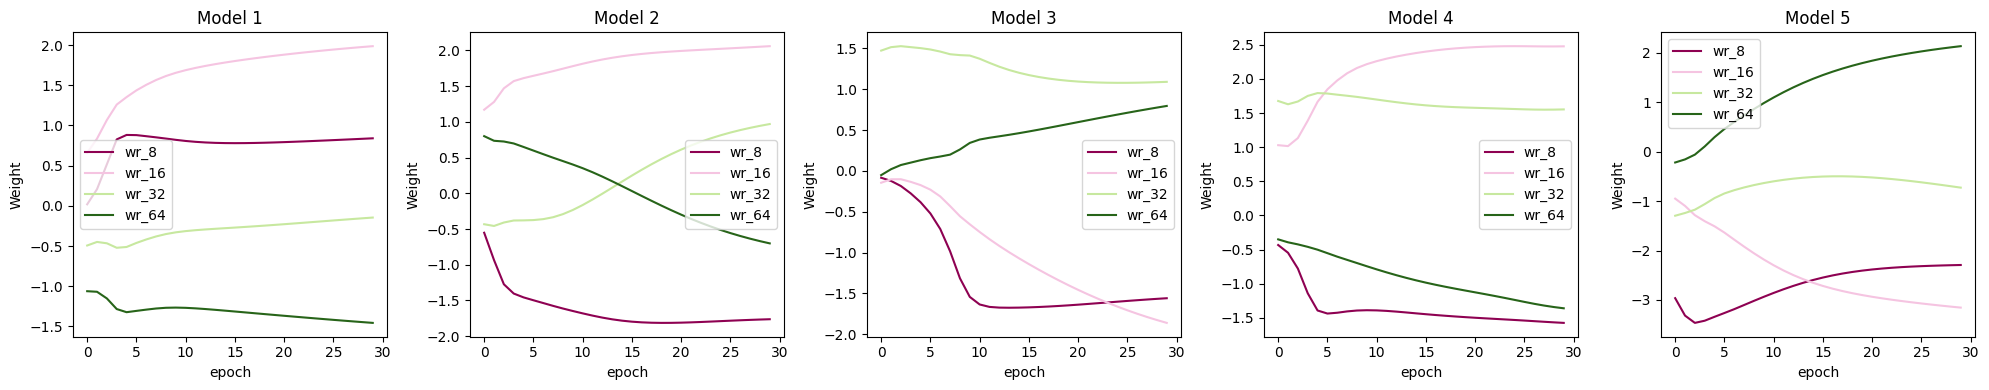

In [73]:
plot_weights_evolution_all_models(json_files, 'wr')  #resolution

C:\Users\aapolina\AppData\Local\Temp\ipykernel_16944\42889491.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
C:\Users\aapolina\AppData\Local\Temp\ipykernel_16944\42889491.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


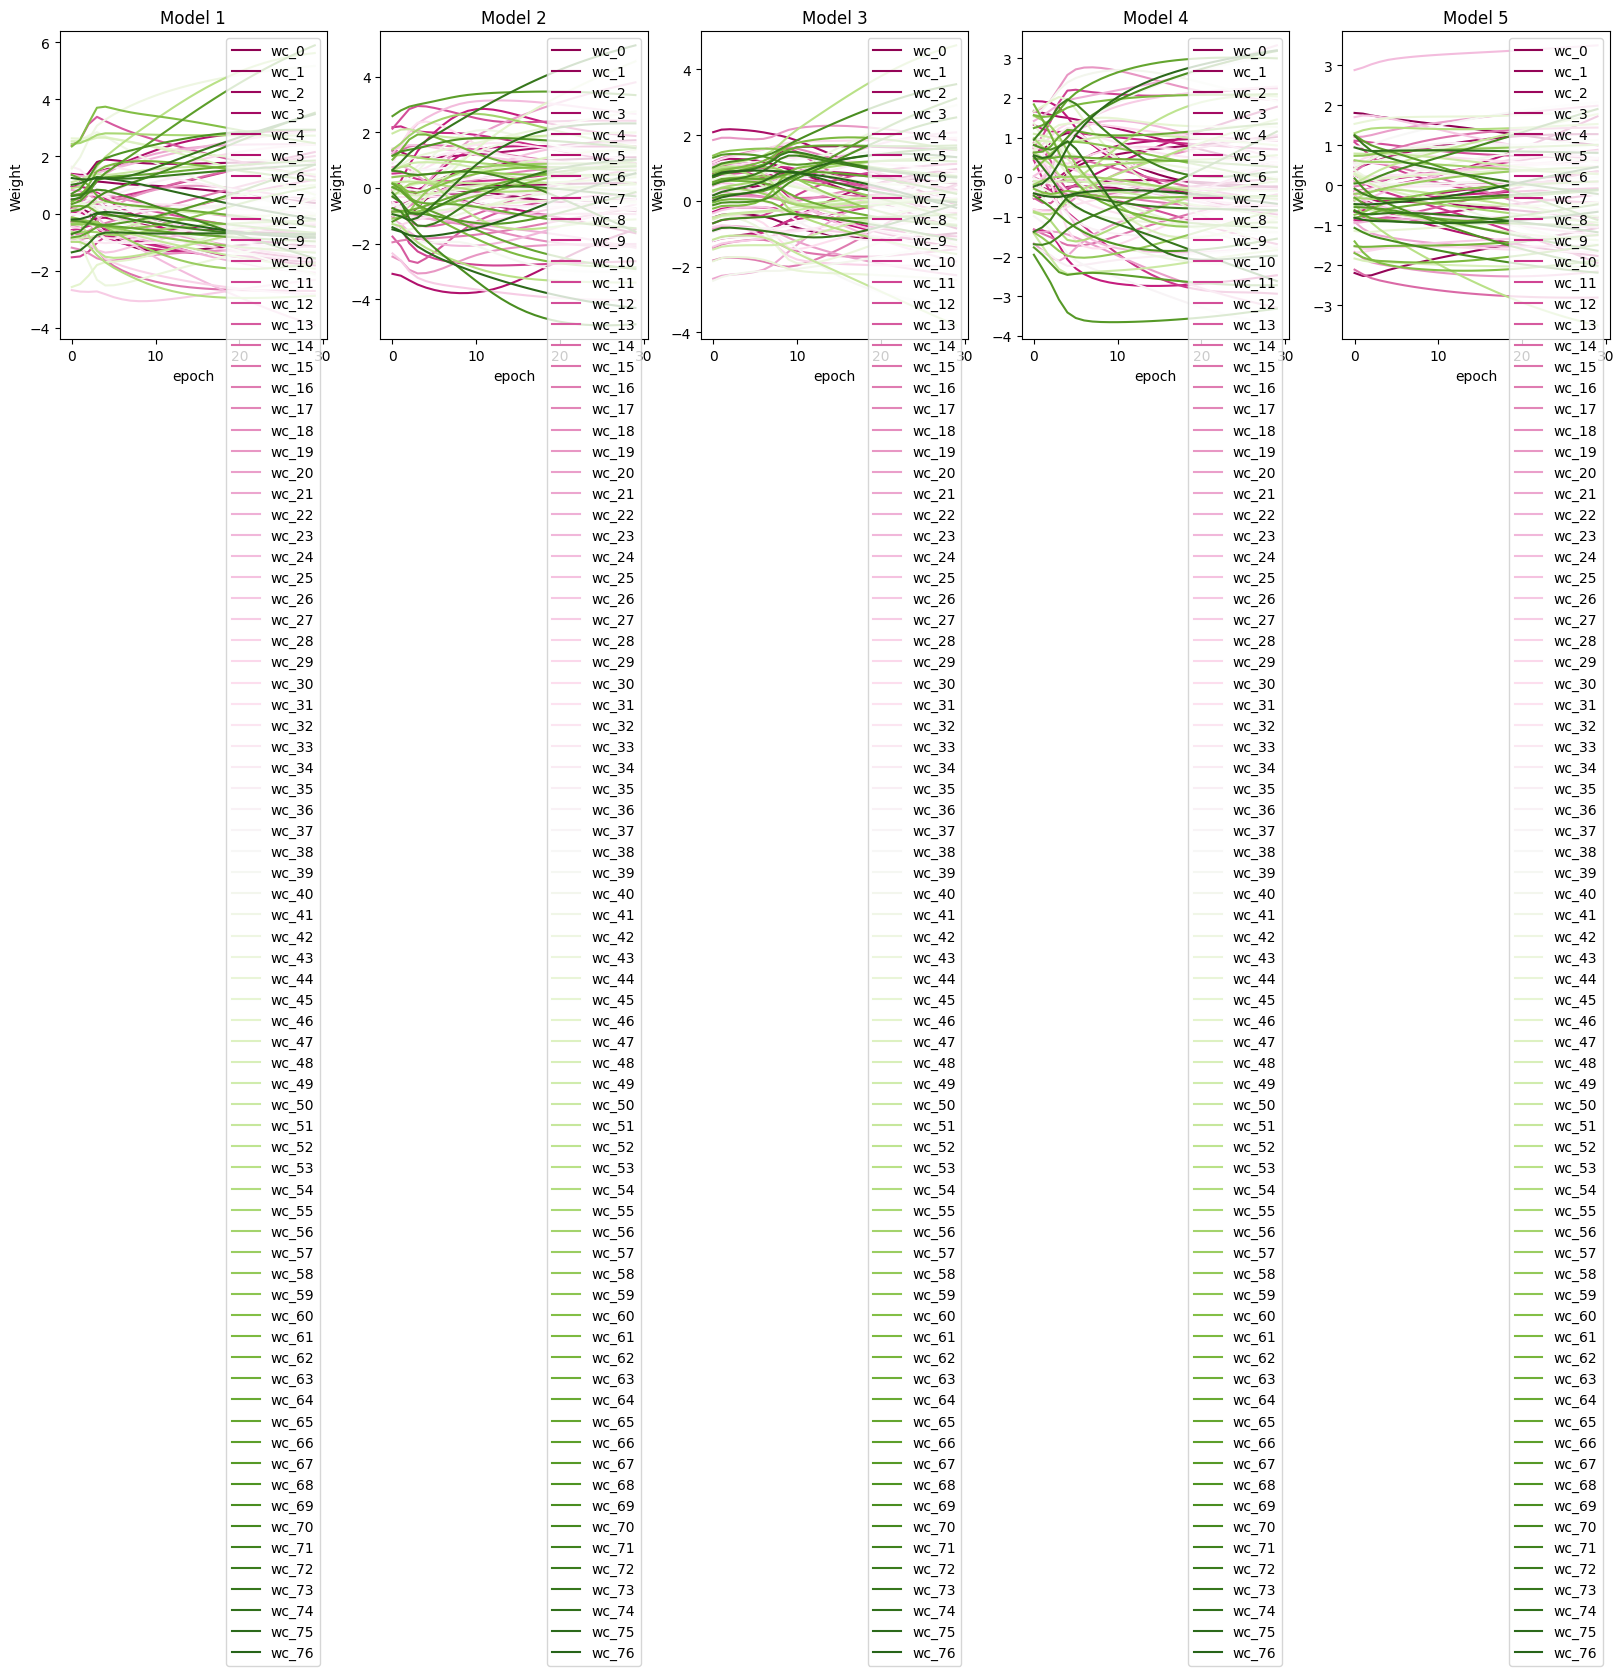

In [74]:
plot_weights_evolution_all_models(json_files, 'wc') #channels